In [221]:
import pandas as pd

In [222]:
data = pd.read_csv('results.csv')

In [223]:
data.sort_values('dev_f1', ascending=False)

,model_name,train_dataset,added_gold,distant,model_params,test_f1,test_precision,test_recall,corr_f1,corr_precision,corr_recall,dev_f1,dev_precision,dev_recall
173,supervised_coregularized,conll03,0.50,with_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.914839,0.935921,0.894686,0.928255,0.954463,0.903448,0.942041,0.959992,0.924749
165,supervised_coregularized,conll03,0.50,with_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.914877,0.933266,0.897198,0.928845,0.952304,0.906513,0.941690,0.957696,0.926210
181,supervised_coregularized,conll03,0.50,with_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.915694,0.938349,0.894106,0.928931,0.956751,0.902682,0.941253,0.958357,0.924749
189,supervised_coregularized,conll03,0.50,with_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.912032,0.931319,0.893527,0.926221,0.950595,0.903065,0.941242,0.956965,0.926027
156,supervised_coregularized,conll03,0.50,with_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.912760,0.934954,0.891594,0.925805,0.953135,0.900000,0.941034,0.958689,0.924018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,supervised,conll03,0.05,without_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
190,supervised_coregularized,conll03,0.05,without_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
194,supervised_coregularized,conll03,0.30,without_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40,supervised,conll03,0.05,without_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [224]:
import json
from pprint import pprint
pprint(json.loads(data.loc[177]['model_params'].replace("'", '"')))

{'agreement_strength': 200.0,
 'batch_size': 4,
 'bert_dropout': 0.1,
 'head_dropout': 0.3,
 'learning_rate': 5e-05,
 'n_models': 3,
 'ner_fit_epochs': 7,
 'warmup_proportion': 0.2}


In [225]:
# hp analysis
from pprint import pprint
import json
grouped = data.drop('train_dataset', axis=1).groupby(['distant', 'model_name'])
for name, group in grouped:
    print(name)
    best_idx = group['dev_f1'].idxmax()
    pprint(json.loads(group['model_params'].loc[best_idx].replace("'", '"')))
    print(group.loc[best_idx])
    print('   ')

('with_distant', 'bond')
{'batch_size': 4,
 'bert_dropout': 0.1,
 'end_updates': 1.0,
 'head_dropout': 0.3,
 'label_keep_threshold': 0.9,
 'learning_rate': 5e-05,
 'ner_fit_epochs': 1,
 'self_training_epochs': 2,
 'self_training_lr_proportion': 0.1,
 'start_updates': 2.0,
 'warmup_proportion': 0.5}
model_name                                                     bond
added_gold                                                      0.5
distant                                                with_distant
model_params      {'learning_rate': 5e-05, 'batch_size': 4, 'ber...
test_f1                                                    0.895449
test_precision                                             0.877271
test_recall                                                0.914396
corr_f1                                                    0.909502
corr_precision                                             0.895323
corr_recall                                                0.924138
dev_f1              

In [226]:
grouped = data.drop('train_dataset', axis=1).groupby(['distant', 'model_name'])

In [227]:
stats = data.drop('train_dataset', axis=1).groupby(['distant', 'model_name', 'added_gold']).aggregate(['mean', 'median', 'std', 'count'])

In [228]:
distant_data = data[data['distant'] == 'with_distant']
normal_data = data[data['distant'] == 'without_distant']
bond_data = data[data['model_name'] == 'bond']

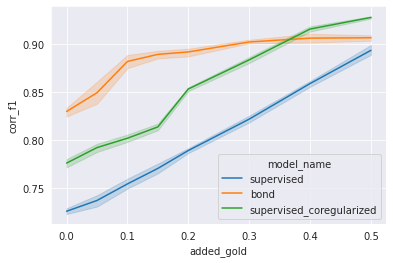

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=distant_data, x='added_gold', y='corr_f1', hue='model_name')
plt.savefig('experiments/plots/distant_f1.png', dpi=1200)

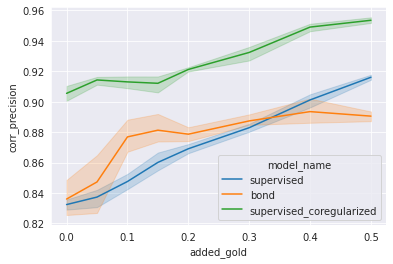

In [230]:
sns.lineplot(data=distant_data, x='added_gold', y='corr_precision', hue='model_name')
plt.savefig('experiments/plots/distant_precision.png', dpi=1200)

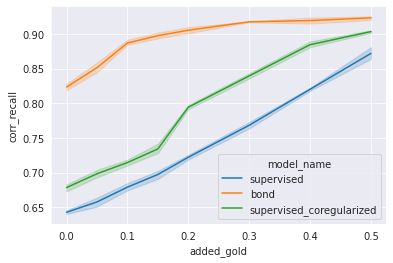

In [231]:
sns.lineplot(data=distant_data, x='added_gold', y='corr_recall', hue='model_name')
plt.savefig('experiments/plots/distant_recall.png', dpi=1200)

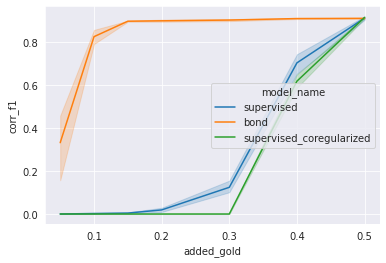

In [232]:
sns.lineplot(data=normal_data, x='added_gold', y='corr_f1', hue='model_name')
plt.savefig('experiments/plots/normal_f1.png', dpi=1200)

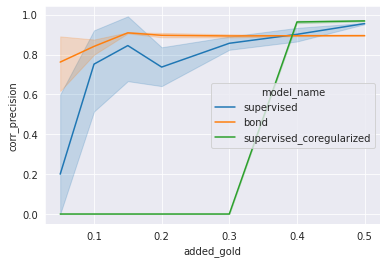

In [233]:
sns.lineplot(data=normal_data, x='added_gold', y='corr_precision', hue='model_name')
plt.savefig('experiments/plots/normal_precision.png', dpi=1200)

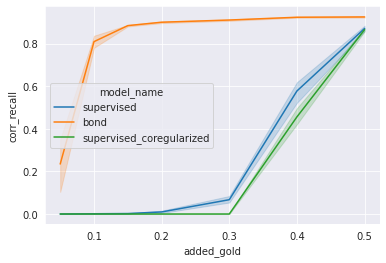

In [234]:
sns.lineplot(data=normal_data, x='added_gold', y='corr_recall', hue='model_name')
plt.savefig('experiments/plots/normal_recall.png', dpi=1200)

In [235]:
bond_data = bond_data.rename(columns={'distant': 'markup'})
dynet = pd.read_csv('dynet_results.csv')
dynet.columns = ['added_gold', 'test_f1', 'test_precision', 'test_recall']
for val_col in ['test_f1', 'test_precision', 'test_recall']:
    dynet[val_col] /= 100
dynet['markup'] = 'base_estimation'

In [236]:
bond_data = pd.concat([bond_data, dynet], ignore_index=True)
bond_data

,model_name,train_dataset,added_gold,markup,model_params,test_f1,test_precision,test_recall,corr_f1,corr_precision,corr_recall,dev_f1,dev_precision,dev_recall
0,bond,conll03,0.10,without_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.842334,0.861122,0.824348,0.852478,0.875909,0.830268,0.853443,0.871054,0.836530
1,bond,conll03,0.05,without_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.319670,0.480062,0.239614,0.316707,0.478868,0.236590,0.329234,0.466957,0.254247
2,bond,conll03,0.15,without_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.885597,0.893257,0.878068,0.896806,0.909073,0.884866,0.895943,0.902670,0.889315
3,bond,conll03,0.20,without_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.896799,0.900292,0.893333,0.908880,0.916943,0.900958,0.916247,0.918349,0.914155
4,bond,conll03,0.30,without_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.887897,0.873295,0.902995,0.903446,0.892964,0.914176,0.921830,0.909220,0.934795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,NaN,NaN,0.30,base_estimation,NaN,0.885752,0.888197,0.883322,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,0.20,base_estimation,NaN,0.869966,0.871667,0.868272,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,0.10,base_estimation,NaN,0.819632,0.883545,0.764341,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,0.15,base_estimation,NaN,0.867647,0.890276,0.846140,NaN,NaN,NaN,NaN,NaN,NaN


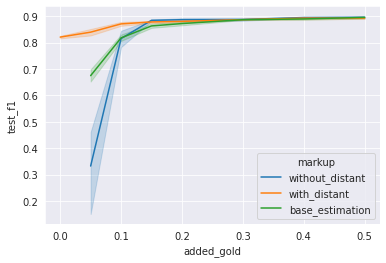

In [237]:
sns.lineplot(data=bond_data, x='added_gold', y='test_f1', hue='markup')
plt.savefig('experiments/plots/bond_f1.png', dpi=1200)

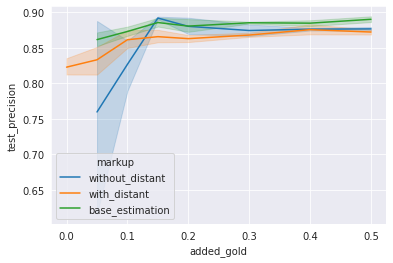

In [219]:
sns.lineplot(data=bond_data, x='added_gold', y='test_precision', hue='markup')
plt.savefig('experiments/plots/bond_precision.png', dpi=1200)

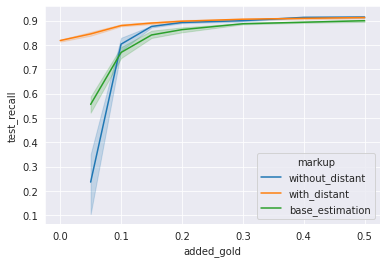

In [220]:
sns.lineplot(data=bond_data, x='added_gold', y='test_recall', hue='markup')
plt.savefig('experiments/plots/bond_recall.png', dpi=1200)

In [78]:
grouped.groups

{('None', 'bond'): [10, 11, 12, 13, 14, 15, 16, 17, 67, 70, 71, 72, 73, 74, 75, 76, 79, 80, 82, 83, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162], ('None', 'coregularized'): [46, 47, 48, 49, 50, 51, 52, 53, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131], ('None', 'supervised'): [38, 39, 40, 41, 42, 43, 44, 45, 106, 107, 109, 111, 112, 113, 114, 115, 116, 117, 118, 120], ('distant', 'bond'): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146], ('distant', 'coregularized'): [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 108, 110, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190], ('distant', 'supervised'): [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 77, 78, 81, 84, 85, 86, 87, 88, 89, 90, 91, 92, 160, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 1